# Converting an old Basic program to Python to calculate the back projection in a mock CT scanner

I have this code in Basic that I would like to convert to Python. The first segment creates two arrays called "Projection" and "Backprojection". Let's import some stuff so we can make these arrays.

DIM PROJECTION(34, 30)
DIM BACKPROJECTION(32, 32)

In [1]:
import math
import matplotlib
# plotting vector fields
import numpy as np
import matplotlib.pyplot as plt

# scale and font sizes for the plots
plt.rcParams['figure.figsize'] = (12, 12)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16

Now, let's create the arrays and load in some data. The following will make the array any size we collect from the scanner.

[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]]
(35, 30)


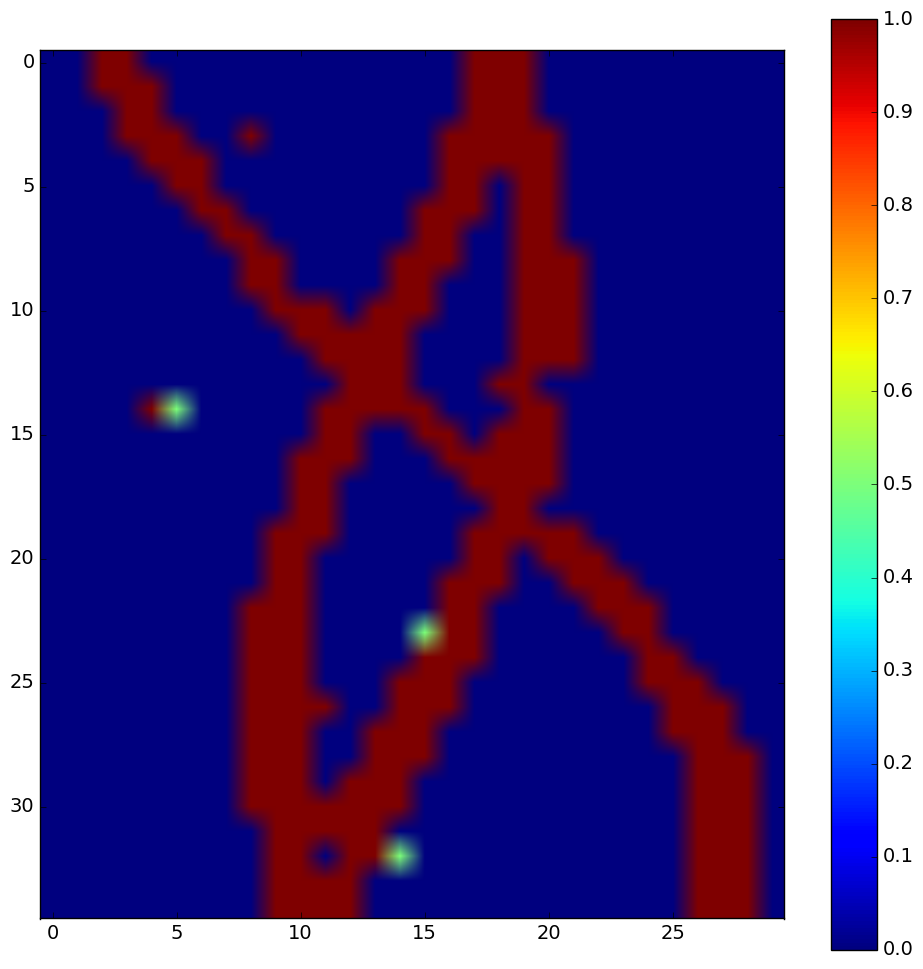

In [2]:
Projection = np.genfromtxt('threeobjectexample.csv',delimiter=',')
print(Projection) #check the values
print(Projection.shape) #check the shape
plt.imshow(Projection, clim=(0.0, 1.0)) #see it
plt.colorbar()
plt.show()


The next bit in the Basic program is a comment. Then, the PROJECTION array gets filled. We've done the filling above by reading in a csv file. The csv file needs to be rows corresponding to angle. Currently, it is 0 to 180 degrees in steps of 5.25 degrees. The columns are the projection along a translational coordinate. Currently, we are scanning 0.5 cm from 7.5 cm to the right and 7.5 cm to the left of the sensor. This is 31 columns in theory. Eventually, we should make this arbritrary with rotational and translational values input by the user.

'Input manually the values for the projections. The elements PROJECTION(n,z)
'correspond to the projection obtained at the angle n (measured in intervals
'of 5.25 degrees, and at the projection coordinate z (in intervals of 1 cm).

Now we need to figure out the actual algorithm that does the backprojection.

In [3]:
Backprojection = np.zeros([32, 32],dtype=float)
delta_theta = 5.25 #degrees for each rotation
delta_x = 0.5 #cm of translation for each step
theta1=np.arange(0, 89.25,5.25) #angles up to 90 degrees

for xindex in range(0, 30):
    for yindex in range(0, 30):
        for n in range(0, 17):
            for projectionindex in range (0, 30):
                s = projectionindex-15.5
                d = (yindex-15.5) * math.cos(n*delta_theta*math.pi/180) - s - math.sin(n*delta_theta*math.pi/180) * (xindex-15.5)
                #print(xindex, yindex, n, projectionindex)
                #xindex = x1 + 15.5
                #yindex = y1 + 15.5
                if abs(d) < 0.5:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] + Projection[n, projectionindex]
                if abs(d) >= 0.5 and abs(d) < 1:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] + .1 * Projection[n, projectionindex]
                if abs(d) >= 1 and abs(d) < 1.5:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] - .5 * Projection[n, projectionindex]
                if abs(d) > 1.5 and abs(d) < 2:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] - .4 * Projection[n, projectionindex]
        for n in range(18, 34):
            for projectionindex in range (0, 30):
                s = projectionindex-15.5
                dd = -(yindex-15.5) * math.cos(n*delta_theta*math.pi/180) + s + math.sin(n*delta_theta*math.pi/180) * (xindex-15.5)
                #xindex = x1 + 15.5
                #yindex = y1 + 15.5
                if abs(dd) < 0.5:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] + Projection[n, projectionindex]
                if abs(dd) >= 0.5 and abs(dd) < 1:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] + .1 * Projection[n, projectionindex]
                if abs(dd) >= 1 and abs(dd) < 1.5:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] - .5 * Projection[n, projectionindex]
                if abs(dd) > 1.5 and abs(dd) < 2:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] - .4 * Projection[n, projectionindex]

[[ 1.2   0.6   0.5  ...,  1.2   0.    0.  ]
 [ 2.3   1.5   0.4  ...,  1.    0.    0.  ]
 [ 2.6   2.7   0.2  ...,  2.    0.    0.  ]
 ..., 
 [ 0.1  -0.1   1.9  ...,  2.15  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]


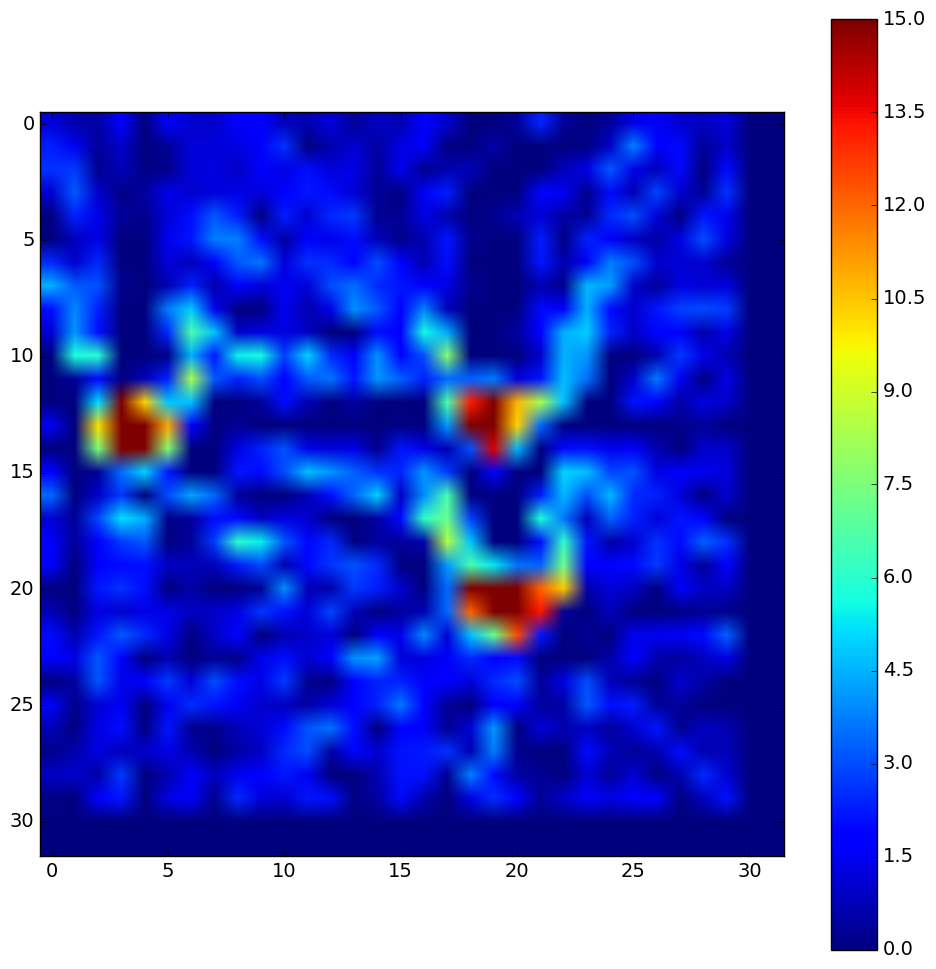

In [4]:
print(Backprojection)
plt.imshow(Backprojection, clim=(0.0, 15.0)) #see it
plt.colorbar()
plt.show()

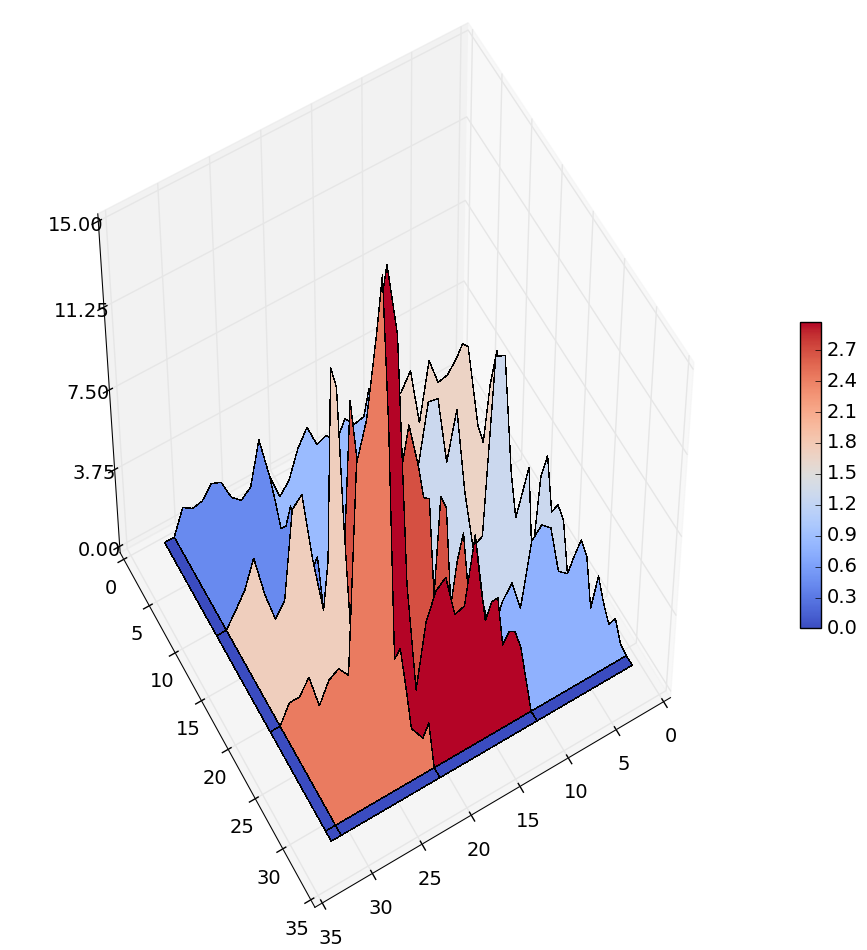

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
Xs = np.arange(1, 33)
Ys = np.arange(1, 33)
Xs, Ys = np.meshgrid(Xs, Ys)
surf = ax.plot_surface(Xs, Ys, Backprojection, cmap=cm.coolwarm,
                       linewidth=0.25, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 15)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(50, 60)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.33, aspect=15)
plt.show()

In [46]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='troycmessina', api_key='tfsYj7RN6kG9RQtESjS9')
import pandas as pd


data = [
    go.Surface(
        z=Backprojection
    )
]
layout = go.Layout(
    title='CT Backprojection',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~troycmessina/0 or inside your plot.ly account where it is named 'elevations-3d-surface'
